# PyTorch

## 人工神经网络 VS 生物神经网络

科学家们通过长久的探索，想让计算机像人一样思考，所以研发了人工神经网络，它究竟和我们的神经网络有多像?

### 生物神经网络

900亿神经细胞组成了我们复杂的神经网络系统，这个数量甚至可以和宇宙中的星球数相比较。如果仅仅靠单个的神经元，是永远没有办法让我们像今天一样，完成各种任务，处理各种复杂的问题。那我们是如何靠这些神经元来解决问题的呢? 

初始时期（婴儿），神经元并没有形成系统和网络，可能只是一些分散的细胞而已。当我们初次品尝糖果的时候，美妙的感觉，让我们的候神经元开始产生联结，记忆形成。我们的手和嘴产生了某种特定的搭配：每次发现有糖果的时候，某种生物信号就会从我们的嘴，通过之前形成的神经联结，传递到手上，让手的动作变得有意义！

### 人工神经网络

替代生物神经网络的是已经成体系的人工神经网络。所有神经元之间的连接都是固定不可更换的，在人工神经网络里，没有凭空产生新联结这回事。

人工神经网络典型的一种学习方式就是：我们已经知道吃到糖果时手会如何动，但是我们需要让神经网络学着帮我们做这件动手的事情。

我们预先准备好非常多吃糖的学习数据，然后将这些数据一次次放入这套人工神经网络系统中，糖的信号会通过这套系统传递到手，然后通过对比这次信号传递后手的动作是不是“讨糖”动作，来修改人工神经网络当中的*神经元强度*。

这种修改在专业术语中叫做“**误差反向传递**”，也可以看作是再一次将传过来的信号传回去, 看看这个负责传递信号神经元对于”讨糖”的动作是否有贡献，让它好好反思与改正，争取下次做出更好的贡献。

### 对比

人工神经网络靠的是*正向*和*反向*传播来*更新神经元*，从而形成一个*好的神经系统*。本质上，这是一个**能让计算机处理和优化的数学模型**。

生物神经网络是通过*刺激*，*产生新的联结*，让信号能够通过新的联结传递而*形成反馈*。我们身体里的神经系统经过了数千万年的进化，迄今为止，再庞大的人工神经网络系统也不能替代我们的小脑袋！

人工神经网络和生物神经网络不是一回事。:)


## why PyTorch

PyTorch 是 Torch 在 Python 上的衍生。 Torch 很好用, 但是 Lua 不是特别流行，有开发团队将 Lua 的 Torch 移植到了更流行的语言 Python 上，就有了 PyTorch 。

Torch 自称为神经网络界的 Numpy ，因为他能将 torch 产生的 tensor 放在 GPU 中加速运算 (前提是环境里有合适的 GPU)，就像 Numpy 会把 array 放在 CPU 中加速运算。

对比静态的 Tensorflow ，PyTorch 最大优点就是建立的神经网络是动态的，能更有效地处理一些问题。

## 安装

参考 [官方文档](https://pytorch.org/get-started/locally/)

```shell
# create a new env
conda create --name neuro --clone base
conda activate neuro
# install pytorch
conda install pytorch torchvision torchaudio -c pytorch
```

In [1]:
import torch
from torch.autograd import Variable
import numpy as np

In [2]:
# 安装验证

print("version:", torch.__version__)

x = torch.rand(5, 3)
print(x)

version: 1.13.1
tensor([[0.1300, 0.2036, 0.4770],
        [0.6150, 0.2109, 0.4134],
        [0.5040, 0.4057, 0.9052],
        [0.2462, 0.5971, 0.0620],
        [0.1223, 0.5047, 0.4279]])


检测 GPU 是否可用

In [3]:
# nvidia graphics cards (CUDA Graphs)
torch.cuda.is_available()

False

检测 Apple Silicon chip GPU

In [4]:
# MPS (Metal Performance Shaders)
print('MPS is available for current MacOS:', torch.backends.mps.is_available())
print('MPS is activated for current PyTorch:', torch.backends.mps.is_built())


MPS is available for current MacOS: True
MPS is activated for current PyTorch: True


In [5]:
? torch.has_mps

Type:        bool
String form: True
Docstring:  
bool(x) -> bool

Returns True when the argument x is true, False otherwise.
The builtins True and False are the only two instances of the class bool.
The class bool is a subclass of the class int, and cannot be subclassed.

In [6]:
import math

dtype = torch.float
device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1490.728515625
199 1057.0257568359375
299 750.2742919921875
399 533.3062744140625
499 379.8380432128906
599 271.28125
699 194.49136352539062
799 140.17092895507812
899 101.74423217773438
999 74.56015014648438
1099 55.32908630371094
1199 41.72401428222656
1299 32.09886932373047
1399 25.28927230834961
1499 20.471546173095703
1599 17.062992095947266
1699 14.651412963867188
1799 12.945165634155273
1899 11.73794174194336
1999 10.883792877197266
Result: y = -0.04807331785559654 + 0.854812741279602 x + 0.008293450810015202 x^2 + -0.09305614978075027 x^3


<hr/>

矩阵乘法 matrix multiplication

In [7]:
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)

print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy:', np.matmul(data, data),
    '\ntorch:', torch.mm(tensor, tensor)
)


matrix multiplication (matmul) 
numpy: [[ 7 10]
 [15 22]] 
torch: tensor([[ 7., 10.],
        [15., 22.]])


In [8]:
tensor = torch.Tensor([1,2,3,4])
print(tensor)

print(tensor.dot(tensor))
# 变为
print(torch.dot(tensor, tensor))

tensor([1., 2., 3., 4.])
tensor(30.)
tensor(30.)


In [9]:
tensor = torch.Tensor([[1,2], [3,4]])

# 点乘 抛出错误
# torch.dot(tensor, tensor)
# RuntimeError: 1D tensors expected, but got 2D and 2D tensors

torch.matmul(tensor, tensor)

tensor([[ 7., 10.],
        [15., 22.]])

### Variable

In [10]:
tensor = torch.FloatTensor([[1, 2], [3, 4]])
# requires_grad 是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)

print(tensor)
print(variable)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [11]:
t_out = torch.mean(tensor * tensor)

# 这步将在计算图中添加的一个计算步骤, 计算误差反向传递的时候有他一份功劳
v_out = torch.mean(variable * variable)

print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


上面这个步骤，看不出两种计算有什么区别。但事实上, Variable 计算时, 它在背景幕布后面一步步默默地搭建着一个庞大的系统, 叫做计算图 computational graph 。这个图是将所有的计算步骤 (节点) 都连接起来, 最后进行误差反向传递的时候, 一次性将所有 variable 里面的修改幅度 (梯度) 都计算出来, 而 tensor 就没有这个能力。

In [12]:
# v_out.backward()

# 初始 Variable 的梯度
print(variable.grad)

None


### 激励函数 Activation

一句话概括 Activation ：就是让神经网络可以描述非线性问题的步骤，是神经网络变得更强大。

Torch 中的激励函数有很多, 不过平时要用到的就这几个 `relu`, `sigmoid`, `tanh`, `softplus` 。

In [13]:
# 激励函数都在这
import torch.nn.functional as F

In [14]:
# 生成一些数据
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

In [15]:
# 为作图转换为 numpy array
x_np = x.data.numpy()

# 几种常用的 激励函数
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# softmax 它是关于概率的, 用于分类。比较特殊, 不能直接显示
y_softmax = F.softmax(x, dim=0)


将几个激励函数的结果用图形显示出来

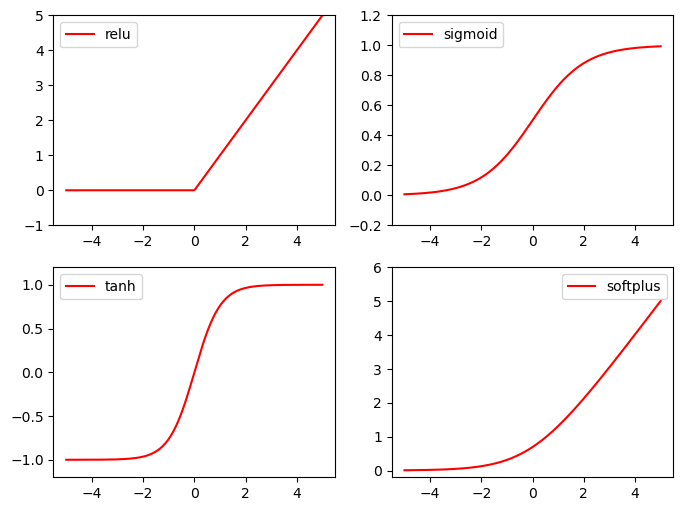

In [16]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(8, 6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()